# Class 07 ESG Data Identification #

## **Personal Homework Goals**
- Import MSCI Non-ESG and ESG Leader Dataset into JupyterLab
- Explore dataset and identify head, tail, mean, median, and mode
- Try to conduct a preliminary analysis

## **About My Date: 2 Datesets**
- MSCI Emerging Market ESG Screened and Non-ESG Screened Index (Cited in over 5 of my focused Lit Rev journal articles; most robust dataset on the matter)
- Benfit of Indices: Measure risk-return characteristics of equities without having to filter out transaction cost of funds, fund management skill, or timing activities of fund management (Schroder 2007, Weber and Ang 2016)
- Both are measured against Emerging Markets Index (parent index)
- Aggregate of large and mid-cap securities (representative of firms) across 25 Emerging Markets (largest 3 contributors: China, Taiwan, India)
- Covers approximately 92% of the free-float adjusted market capitalizations in the Emerging Market countries; representative of current ESG investment frontier
- In my analysis, I measure the net monthly returns of standard-cap MSCI EM ESG Indices and non-ESG MSCI EM Indices from August 2007 to September 2023 (Currently working with shortlisted data from 2019-2023)
- Timeframe of 2007 to 2023 is important because allows for examination of resilience/rebound of both treatments following GFC, allowing for the causal-comparative study (Recovery of ESG-EM post-2008 compared to role of more traditional investments) 
- Top Represented Sectors: Financials (23.41%), Information Tech (21.2%), Consumer Discretionary (14.38%), Communication Services (10.11%), Materials (7.02%), and Industrials (6.2%)
I

**MSCI Emerging Market Index:**
- Looks at 1,437 constituents, weighted by relative market cap (largest weight 6.12; average 0.07)

**MSCI EM ESG Screened Indx**

- Looks at 1,316 constituents, weighted by their relative market cap (largest weight 6.48; average 0.08)
- ESG Screening Comes from Exclusion of X Characteristics from Parent Index:
> "Association with  controversial, civilian and nuclear weapon;  tobacco, palm oil and arctic oil & ga; t derive revenues from thermal coal power and extraction of select fossil fue;re not in compliance wi h
the United Nations Global Compact princip; or Companies that are involved in Red Flor Orange Flag scandal. Targets 30% reduction of carbon emissions through firm and structure reorganization" - MSCI)
- Scored by four main pillars:
    - Intangible Value Assessment: Identifies key issues for each industry, 
evaluates company risk exposur/ managemens, an  generate 
ratings measuring unmanaged ESG ri
    - Impact Monitor: Groups ESG controversies and violations of global norms.
    -  Business Involvemen: Identifies the nature and 
extent of company business activities to support ESG portfolio screening
    - Government Rating: Assesses government related 
ESG risk exposure and risk management practice


**Limitations:**
- Dataset Specific: Incorporation of energy impacts non-ESG EM performance due to the extremely volatile nature of energy investments
- General recency associated with ESG investing, namely lack of standardization and minimal tracking/reporting 
- Focuses on returns: Would be fruitful to include the movement of Beta to look at whether ESG integration makes sensitive industries less volati
- Working with a smaller dataset till I can get full access (2019-2023)l
- 

##  **Importing the necessary libraries and overview of the dataset**

In [7]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### **Loading the dataset**

In [8]:
data = pd.read_csv("emdset 2.csv")

In [9]:
df = data.copy()

### Data Overview

In [10]:
data

,Date,Non ESG EM,Non ESG EM (Value),ESG EM
0,9-Oct-19,993.01,993.01,1011.01
1,10-Oct-19,996.50,996.50,1014.50
2,11-Oct-19,1011.54,1011.54,1019.54
3,14-Oct-19,1017.45,1017.45,1027.45
4,15-Oct-19,1019.25,1019.25,1024.25
...,...,...,...,...
1038,2-Oct-23,951.49,951.49,971.49
1039,3-Oct-23,939.16,939.16,948.16
1040,4-Oct-23,927.86,927.86,943.86
1041,5-Oct-23,930.23,930.23,934.23


In [11]:
#Shows first five observations
data.head()

,Date,Non ESG EM,Non ESG EM (Value),ESG EM
0,9-Oct-19,993.01,993.01,1011.01
1,10-Oct-19,996.50,996.50,1014.50
2,11-Oct-19,1011.54,1011.54,1019.54
3,14-Oct-19,1017.45,1017.45,1027.45
4,15-Oct-19,1019.25,1019.25,1024.25


In [12]:
#Shows last five observations
data.tail()

,Date,Non ESG EM,Non ESG EM (Value),ESG EM
1038,2-Oct-23,951.49,951.49,971.49
1039,3-Oct-23,939.16,939.16,948.16
1040,4-Oct-23,927.86,927.86,943.86
1041,5-Oct-23,930.23,930.23,934.23
1042,6-Oct-23,937.34,937.34,937.34


In [13]:
data.info()
# There are three 1043 data points of study, interestingly two of them objects and one of them is a float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1043 non-null   object 
 1   Non ESG EM          1043 non-null   float64
 2   Non ESG EM (Value)  1043 non-null   float64
 3   ESG EM              1043 non-null   float64
dtypes: float64(3), object(1)
memory usage: 32.7+ KB


### Analyze metrics of the dataset

In [14]:
#Find the range, mean, median, and mode of ESG Market Capitalizations
max_ESG = df["ESG EM"].max()
min_ESG = df["ESG EM"].min()
mean_ESG = df["ESG EM"].mean()
print("The ESG dataset values range from", min_ESG, "to", max_ESG, "and the mean is", mean_ESG)
median_ESG = df["ESG EM"].median()
mode_ESG = df["ESG EM"].mode()
print("The ESG dataset's median is", median_ESG, "and it's mode is", mode_ESG)
#Slightly unsure as to what the mode means here

The ESG dataset values range from 767.41 to 1455.93 and the mean is 1113.5581112176412
The ESG dataset's median is 1075.86 and it's mode is 0      946.01
1      977.85
2      985.14
3      998.28
4     1006.14
5     1020.49
6     1043.85
7     1070.50
8     1131.90
9     1135.93
10    1231.99
11    1309.26
12    1363.60
Name: ESG EM, dtype: float64


In [15]:
#Find the range, mean, median, and mode of Non-ESG Market Capitalizations
max_NonESG = df["Non ESG EM (Value)"].max()
min_NonESG = df["Non ESG EM (Value)"].min()
mean_NonESG = df["Non ESG EM (Value)"].mean()
print("The Non ESG EM dataset values range from", min_NonESG, "to", max_NonESG, "and the mean is", mean_NonESG)
median_NonESG = df["Non ESG EM (Value)"].median()
mode_NonESG = df["Non ESG EM (Value)"].mode()
print("The Non ESG dataset's median is", median_NonESG, "and it's mode is", mode_NonESG)
#Slightly unsure as to what the mode means here

The Non ESG EM dataset values range from 758.2 to 1444.93 and the mean is 1103.3452636625118
The Non ESG dataset's median is 1064.85 and it's mode is 0    964.01
Name: Non ESG EM (Value), dtype: float64


In [16]:
diff_mean=mean_ESG-mean_NonESG
print("The difference between the means of the ESG and Non-ESG indexes is", diff_mean)

The difference between the means of the ESG and Non-ESG indexes is 10.212847555129429


### Plot graph displaying both ESG and Non-ESG Index of Market Cap against each other

In [17]:
#Assign different columns of data into different series
ESG = data['ESG EM']
NonESG = data['Non ESG EM (Value)']
Date = data['Date']

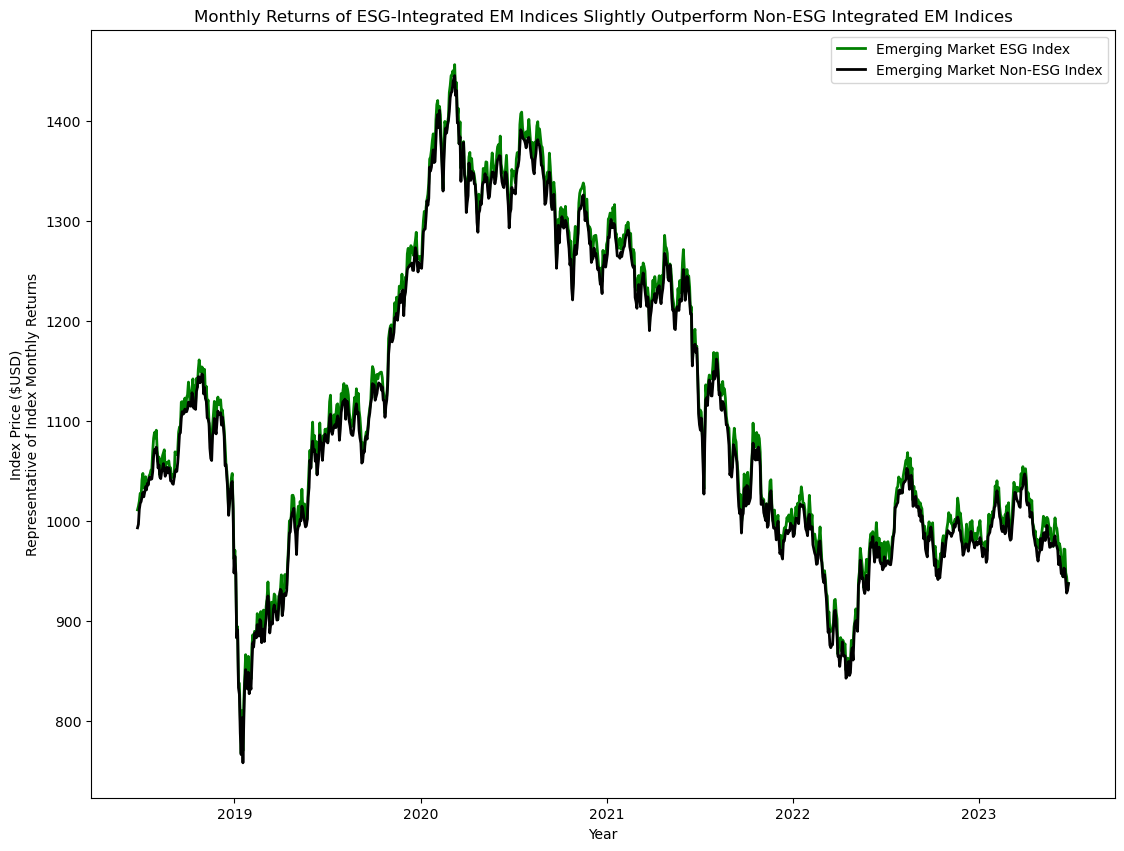

In [18]:
#Attempt at constructing a graph
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])

#Add data to the graph
myaxes.plot(Date, ESG,'green',lw=2)
myaxes.plot(Date, NonESG,'black',lw=2)
#× = np.array([2019, 2020, 2021, 2022, 2023])

#Set labels
myaxes.set_xlabel('Year')
myaxes.set_xticks([208.4-100, 416.8-100, 625.2-100, 833.6-100, 1042-100])
myaxes.set_xticklabels([2019,2020,2021,2022,2023])
myaxes.set_ylabel('Index Price ($USD)\nRepresentative of Index Monthly Returns')
myaxes.set_title(label="Monthly Returns of ESG-Integrated EM Indices Slightly Outperform Non-ESG Integrated EM Indices")
plt.legend(["Emerging Market ESG Index", "Emerging Market Non-ESG Index"], loc=0)
#myaxes.legend()
#Struggled to correct x-axis and put in a legend

### Plot graph displaying % Annualized Returns Compared to Benchmark Annualized Benchmark of Non-ESG Integrated BICS Firms

In [19]:
# Still need to acquire data for Russia
#Look at returns for ESG-screened firms within specific regions, showing their % above or below the country's non-ESG firm index

In [20]:
data = pd.read_csv("bricperformance.csv")
ds = data.copy()

In [21]:
data

,Year,China,India,Brazil,South Africa,Unnamed: 5,Unnamed: 6
0,2022.0,-0.22,-0.07,0.15,-0.03,NaN,100.0
1,2021.0,-0.22,0.27,-0.17,0.04,NaN,NaN
2,2020.0,0.29,0.16,-0.19,-0.04,NaN,NaN
3,2019.0,0.23,0.08,0.27,0.11,NaN,NaN
4,2018.0,-0.19,0.07,0.00,-0.24,NaN,NaN
5,2017.0,0.54,0.39,0.24,0.37,NaN,NaN
6,2016.0,0.00,-0.01,0.67,0.18,NaN,NaN
7,2015.0,-0.08,-0.06,-0.41,-0.25,NaN,NaN
8,2014.0,0.08,0.24,-0.14,0.06,NaN,NaN
9,2013.0,0.04,-0.04,-0.16,-0.06,NaN,NaN


In [22]:
#Assign different columns of data into different series
IN = data['India']
CH = data['China']
BR = data['Brazil']
SA = data['South Africa']
YR = data['Year']

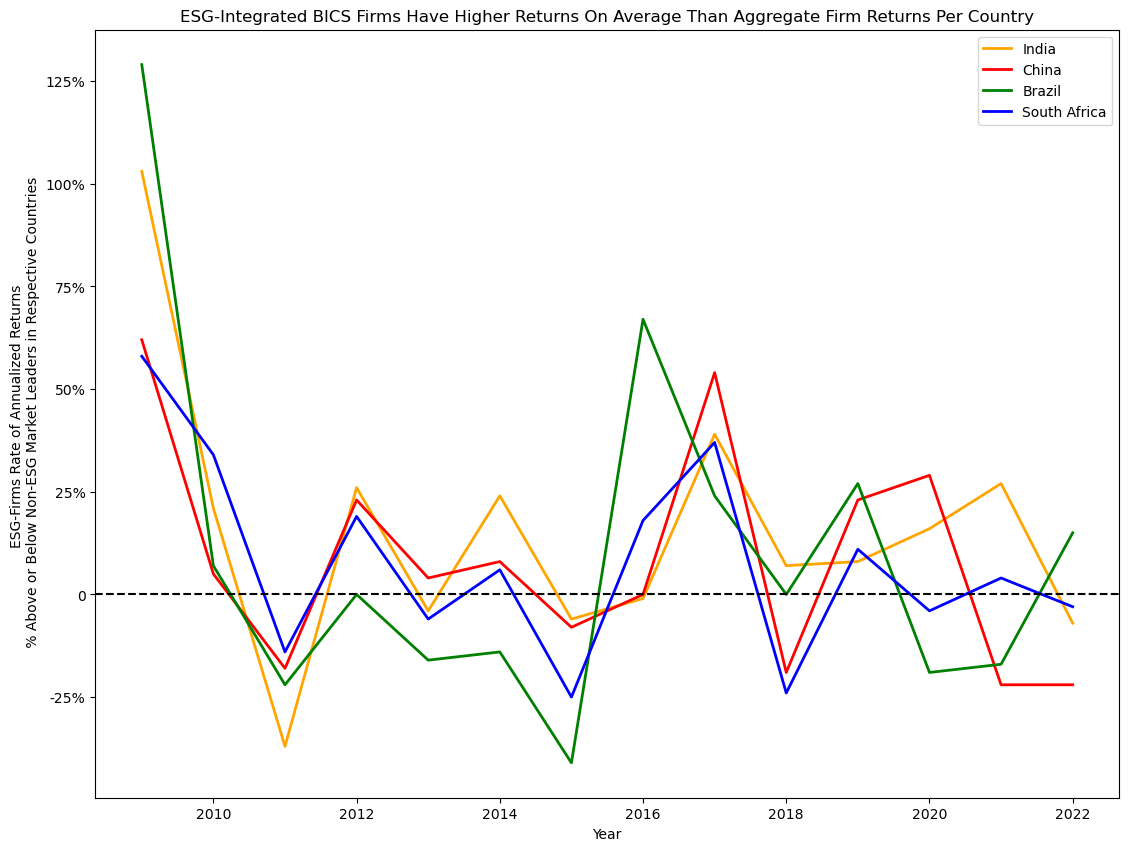

In [23]:
#Attempt at constructing a graph
fig=plt.figure()
myaxes=fig.add_axes([0.1,0.1,1.6,1.6])

#Add data to the graph
myaxes.plot(YR, IN,'orange',lw=2)
myaxes.plot(YR, CH,'red',lw=2)
myaxes.plot(YR, BR,'green',lw=2)
myaxes.plot(YR, SA,'blue',lw=2)

#Set labels
myaxes.set_xlabel('Year')
myaxes.set_yticklabels(["-50%","-25%","0","25%","50%","75%","100%","125%"])
plt.axhline(y=0, linestyle='dashed',color='black')
myaxes.set_ylabel('ESG-Firms Rate of Annualized Returns \n % Above or Below Non-ESG Market Leaders in Respective Countries')
myaxes.set_title(label="ESG-Integrated BICS Firms Have Higher Returns On Average Than Aggregate Firm Returns Per Country")
plt.legend(["India", "China","Brazil","South Africa"], loc=0)

In [24]:
#Tend to above at quite a significant level
#Lowest it goes it -31%, highest is about 126%
#China rarely dips below the national average: representative of countries where ESG integration yields more results (infrastructure in place to reap benefits of ESG integration)